# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:

sensor.isnull().values.any()

False

How many rows and columns are in our data?

In [5]:
# Your code here:
print(sensor.shape)
print("columns = 12")
print("rows = 1751")

(1751, 12)
columns = 12
rows = 1751


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [22]:
# Your code here:

dates = pd.date_range("1/1/2018 00:00:00","1/1/2018 00:29:10", periods=1751)

In [23]:
freq = pd.infer_freq(dates)
print(freq)

S


Assign the time series index to the dataframe's index.

In [25]:
# Your code here:

sensor.index = pd.DatetimeIndex(dates,freq)
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [27]:
# Your code here:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
sensor.index = pd.DatetimeIndex(dates,freq)
sensor.head()

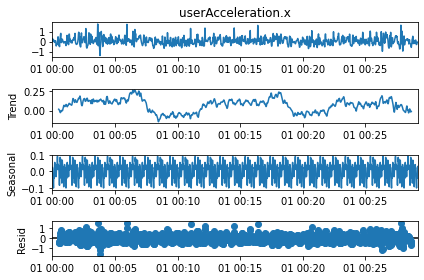

In [32]:
useracceleration = seasonal_decompose(sensor["userAcceleration.x"], period = 60, model="additive")
useracceleration.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

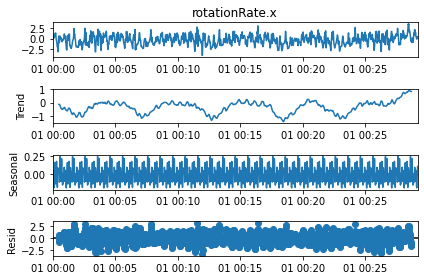

In [33]:
rotationrate = seasonal_decompose(sensor["rotationRate.x"], period = 60, model="additive")
rotationrate.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

In [36]:
import matplotlib.pyplot as plt

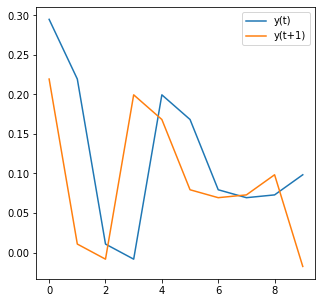

In [37]:
# Your code here:

#A continuación hago un gráfico para ver la serie comparandola con un segundo anterior a la serie.
#Es decir sobre ponerla para ver la diferencia con un segundo anterior. Que nos servirá para la autocorrelación
#y así poder hacer una predicción.
data_t = sensor["userAcceleration.x"][:-1]
data_t_plus_1 = sensor["userAcceleration.x"][1:]
plt.figure(figsize=(5,5))
plt.plot(data_t[:10].values, label="y(t)")
plt.plot(data_t_plus_1[:10].values, label="y(t+1)")
plt.legend();

In [46]:
# A contuniación voy hacer el plot de lag plot que detecta si hay auto correlación.


#Saber que también se puede hacer sin poner lag=1.
#pd.plotting.lag_plot(sensor["userAcceleration.x"]) S
#pd.plotting.lag_plot(sensor["userAcceleration.x"],lag=1)

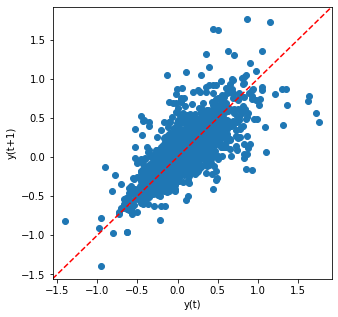

In [45]:
data_t = sensor["userAcceleration.x"][:-1]
data_t_plus_1 = sensor["userAcceleration.x"][1:]
plt.figure(figsize=(5,5))
plt.scatter(x=data_t,y=data_t_plus_1)
plt.xlabel("y(t)")
plt.ylabel("y(t+1)")
plt.plot([0, 1], [0, 1], ls="--", c="r", transform=plt.gca().transAxes);

Create a lag plot for `rotationRate.x`

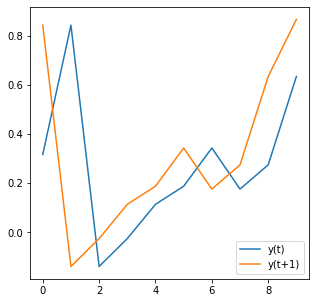

In [47]:
# Your code here:

data_t = sensor["rotationRate.x"][:-1]
data_t_plus_1 = sensor["rotationRate.x"][1:]
plt.figure(figsize=(5,5))
plt.plot(data_t[:10].values, label="y(t)")
plt.plot(data_t_plus_1[:10].values, label="y(t+1)")
plt.legend();

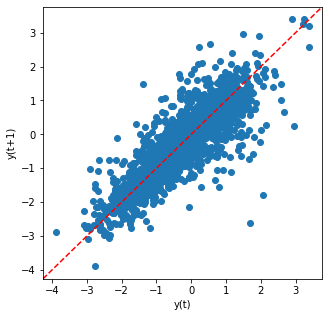

In [48]:
data_t = sensor["rotationRate.x"][:-1]
data_t_plus_1 = sensor["rotationRate.x"][1:]
plt.figure(figsize=(5,5))
plt.scatter(x=data_t,y=data_t_plus_1)
plt.xlabel("y(t)")
plt.ylabel("y(t+1)")
plt.plot([0, 1], [0, 1], ls="--", c="r", transform=plt.gca().transAxes);

What are your conclusions from both visualizations?

In [144]:
# Your conclusions here:

# Las dos tienen autocorrelaciones positivas pero considero que la segunda es mayor. 
# No sé muy bien si hay que concluir más cosas.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

### Augmented Dickey Fuller
Ejemplo del 1º ejer: El valor adf: -17.957994086169762 , p-valor: 6.320230335911768e-06 y por último están los valores críticos: 1%, 5%, 10% (sus valores). El: 4 y 1746 si los sumas te dan el valor de las filas que es la frequencia que se introdujo para crear la serie temporal.

Teoria:
$P-valor$ < que 0,05 rechazamos la $Hipotesis_nula$: la serie no es estacionaria, por lo tanto es estacionaria.

$H_0$ (Null Hypothesis) : The series is not stationary and there is a statistical significant trend

$H_A$ (Alternative Hypothesis) : The series is Stationary
H0 = Hipoteis nula 

In [49]:
# Your code here:

#Estacionaridada
from statsmodels.tsa.stattools import adfuller
userAc = adfuller(sensor["userAcceleration.x"])
userAc


(-17.957994086169762,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [50]:
userAc = adfuller(sensor["rotationRate.x"])
userAc

(-5.2698606250864355,
 6.320230335911768e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

What are your conclusions from this test?

In [56]:
# Your conclusions here:

# Ambas son hipotesis nulas debido a que no tienen estacionaridad.

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

Apuntes de clase:

ARIMA
    
    
    Auto
    Regressive
    
    Integrated
    
    Moving
    Average

As previously seen, we must consider a lot of different characteristics of our signal before trying to model it. But we're finally ready for it.

ARIMA

Our model, ARIMA, is acctually composed of 3 parts: *AR, I, MA.

And we can use any of those separately if the order parameter for the other two are 0.

So we build our model using only the parts we need.

The 3 parameters that compose the order of our ARIMA model are:

order = (p,d,q)

Each relates to it's own part of the model and each of these relates to the 3 operations we've seen previously. We will use these operations to identify the order of the corresponding model:

AR(p)
Partial AutoCorrelation Function

The number n of lags that fall outside of the critical zone.

I(d)
Difference

It refers to the order of differantiation you had to do in order for the series to become stationary.

MA(q)
AutoCorrelation Function

The number n of lags that fall outside of the critical zone.

Saber que ARIMA es: 
- AR(p)
- I(d)
- MA(q)
I(d) puede no estar y se queda en cero. Por ello en este ejercicio nos está pidiendo que calculemos AR + MA

p+d+q or p*d*q

In [59]:
from statsmodels.tsa.arima.model import ARIMA

In [63]:
# Your code here:

y_test = sensor["userAcceleration.x"][-10:]
y_train = sensor["userAcceleration.x"][:-10]
adfuller(y_train)

(-17.93534574610903,
 2.873412357668436e-30,
 4,
 1736,
 {'1%': -3.4341224629678426,
  '5%': -2.863206331927479,
  '10%': -2.5676571071932934},
 -715.8105939817506)

In [68]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

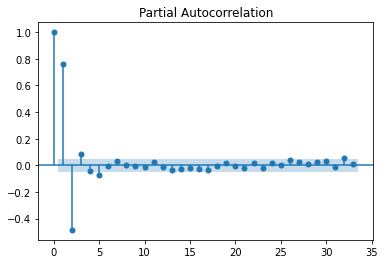

In [73]:
# AR(p)
plot_pacf(y_train);

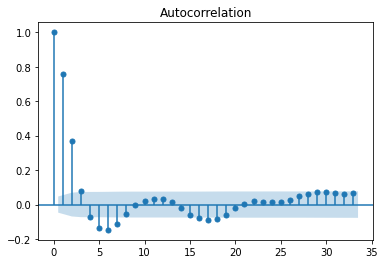

In [74]:
#MA(q)
plot_acf(y_train);

In [76]:
# p=2, d=0(no lo tenemos),  q=2
order = (2,0,2)
arima = ARIMA(y_train,order=order, freq="S")
arima;

In [77]:
arima = arima.fit()

In [132]:
y_pred = arima.predict(len(y_train),len(y_train)+10)

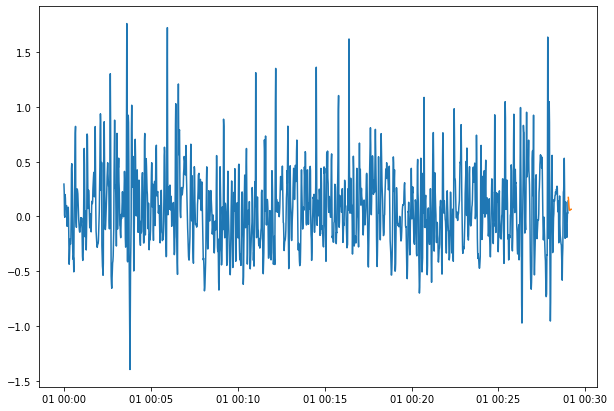

In [133]:
plt.figure(figsize=(10,7))
plt.plot(y_train)
plt.plot(y_pred)

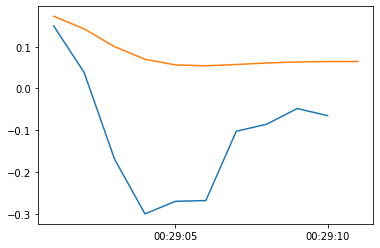

In [134]:
plt.plot(y_test)
plt.plot(y_pred)

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [138]:
from statsmodels.tools.eval_measures import rmse 
from sklearn.metrics import mean_squared_error

#  Se resta hace y_pred[:-1] xq lo predecido suman en total 11 valores y nosotros solo quremos 10.

In [142]:
# Your code here:

rmse(y_test,y_pred[:-1])

0.22538117427496743

In [143]:
mean_squared_error(y_pred[:-1], y_test)

0.050796673717563245